In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import nltk
from wordcloud import WordCloud
from requests import get
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import acquire
import prepare
from sklearn.model_selection import train_test_split

In [2]:
df = prepare.git_df()

In [3]:
df

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0voice/interview_internal_reference,Python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,attached storage ping ping hive hive static fl...
1,2dust/v2rayN,C#,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,client window support core core core core comm...
2,30-seconds/30-seconds-of-code,JavaScript,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,second code short code snippet development nee...
3,521xueweihan/HelloGitHub,Python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,english shield square shield square star shiel...
4,Airblader/i3,C,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status issue shield fork shield star shi...
...,...,...,...,...,...,...,...,...
595,yuzu-emu/yuzu,C++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,emulator project license identifier later widt...
596,zealdocs/zeal,C++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal shield square shield square shield blue s...
597,zergtant/pytorch-handbook,Jupyter Notebook,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,handbook dark handbook handbook issue chapter ...
598,zero-to-mastery/start-here-guidelines,Python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             600 non-null    object
 1   language         600 non-null    object
 2   original         600 non-null    object
 3   clean            600 non-null    object
 4   stemmed          600 non-null    object
 5   lemmatized       600 non-null    object
 6   original_length  600 non-null    int64 
 7   true_clean       600 non-null    object
dtypes: int64(1), object(7)
memory usage: 37.6+ KB


In [5]:
df.language = df.language.str.lower()

In [6]:
df.language.value_counts()

php                 108
c++                 107
python              106
c                   102
html                 83
javascript           20
java                 20
jupyter notebook     20
c#                   18
typescript           16
Name: language, dtype: int64

In [7]:
df.language = df.language.str.replace('javascript','other').str.replace('java','other').str.replace('c#','other').str.replace('typescript','other').str.replace('jupyter notebook','other')
df

,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0voice/interview_internal_reference,python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,attached storage ping ping hive hive static fl...
1,2dust/v2rayN,other,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,client window support core core core core comm...
2,30-seconds/30-seconds-of-code,other,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,second code short code snippet development nee...
3,521xueweihan/HelloGitHub,python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,english shield square shield square star shiel...
4,Airblader/i3,c,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status issue shield fork shield star shi...
...,...,...,...,...,...,...,...,...
595,yuzu-emu/yuzu,c++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,emulator project license identifier later widt...
596,zealdocs/zeal,c++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal shield square shield square shield blue s...
597,zergtant/pytorch-handbook,other,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,handbook dark handbook handbook issue chapter ...
598,zero-to-mastery/start-here-guidelines,python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [8]:
df = df[df.language != 'other']

In [9]:
def split_data(df, column):
    '''This function takes in two arguments, a dataframe and a string. The string argument is the name of the
        column that will be used to stratify the train_test_split. The function returns three dataframes, a 
        training dataframe with 60 percent of the data, a validate dataframe with 20 percent of the data and test
        dataframe with 20 percent of the data.'''
    train, test = train_test_split(df, test_size=.2, random_state=217, stratify=df[column])
    train, validate = train_test_split(train, test_size=.25, random_state=217, stratify=train[column])
    return train, validate, test

In [10]:
train, validate, test = split_data(df, 'language')

In [11]:
ADDITIONAL_STOPWORDS = ['yes']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [12]:
python_words = clean(' '.join(train[train.language == 'python']['true_clean']))
c_words = clean(' '.join(train[train.language == 'c']['true_clean']))
php_words = clean(' '.join(train[train.language == 'php']['true_clean']))
cplus_words = clean(' '.join(train[train.language == 'c++']['true_clean']))
html_words = clean(' '.join(train[train.language == 'html']['true_clean']))
#other_words = clean(' '.join(train[train.language == 'other']['true_clean']))
all_words = clean(' '.join(train['true_clean']))

In [13]:
python_freq = pd.Series(python_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
php_freq = pd.Series(php_words).value_counts()
cplus_freq = pd.Series(cplus_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
#other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [14]:
python_freq = python_freq[python_freq > 2]
python_freq

python      1700
detail       923
summary      877
file         829
code         730
            ... 
forensic       3
sibling        3
fault          3
identify       3
cleaning       3
Length: 2689, dtype: int64

In [15]:
php_freq = php_freq[php_freq > 2]
php_freq

faker        453
code         404
value        282
promise      264
function     257
            ... 
face           3
sheet          3
tested         3
difficult      3
royal          3
Length: 1234, dtype: int64

In [16]:
cplus_freq = cplus_freq[cplus_freq > 2]
cplus_freq

build        285
window       218
code         212
install      208
version      203
            ... 
universal      3
collision      3
leading        3
scope          3
behavior       3
Length: 1249, dtype: int64

In [17]:
c_freq = c_freq[c_freq > 2]
c_freq

file          333
node          331
build         327
message       260
install       222
             ... 
compliance      3
reasonable      3
capstone        3
cracker         3
situation       3
Length: 1464, dtype: int64

In [18]:
html_freq = html_freq[html_freq > 2]
html_freq

sign         1719
heavy        1712
minus        1711
free         1151
angular       623
             ... 
extend          3
signature       3
british         3
sane            3
showing         3
Length: 1754, dtype: int64

In [19]:
# other_freq = other_freq[other_freq > 2]
# other_freq

In [20]:
all_freq = all_freq[all_freq > 2]
all_freq

python          1863
code            1806
file            1755
sign            1751
heavy           1717
                ... 
voting             3
netty              3
culture            3
narrowly           3
surveillance       3
Length: 4186, dtype: int64

In [21]:
word_counts = pd.concat([python_freq, c_freq, php_freq, cplus_freq, html_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['python','c','php','cplus','html','all']
word_counts.head()

,python,c,php,cplus,html,all
python,1700,27,8,74,54,1863
detail,923,37,30,49,30,1069
summary,877,0,5,6,6,896
file,829,333,195,161,237,1755
code,730,182,404,212,278,1806


In [22]:
word_counts.sort_values('all', ascending=False)

,python,c,php,cplus,html,all
python,1700,27,8,74,54,1863
code,730,182,404,212,278,1806
file,829,333,195,161,237,1755
sign,18,0,5,8,1719,1751
minus,0,0,3,0,1711,1717
...,...,...,...,...,...,...
slippery,3,0,0,0,0,3
mysterious,3,0,0,0,0,3
subtract,3,0,0,0,0,3
disappearing,3,0,0,0,0,3


<AxesSubplot:>

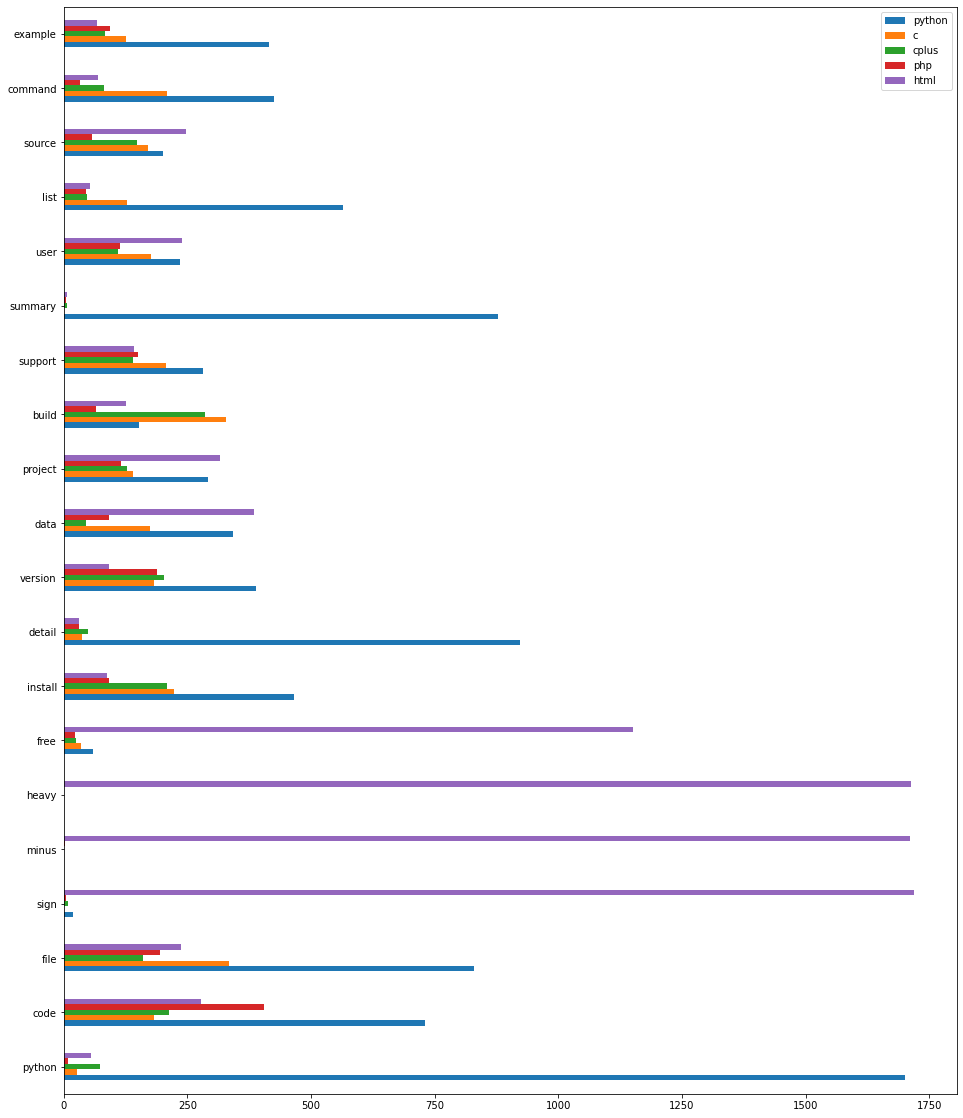

In [87]:
word_counts.sort_values(
    'all', ascending=False
)[['python','c','cplus','php','html']].head(20).plot.barh(figsize=[16,20])

<Figure size 1152x648 with 0 Axes>

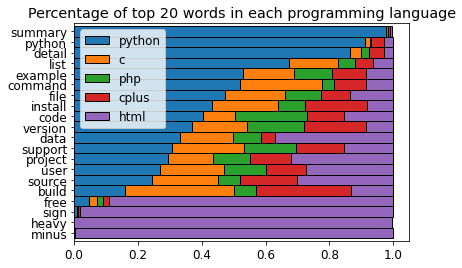

In [98]:
plt.figure(figsize=(16,9))
plt.rc('font', size=12)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'python')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('Percentage of top 20 words in each programming language')
plt.show()

<AxesSubplot:>

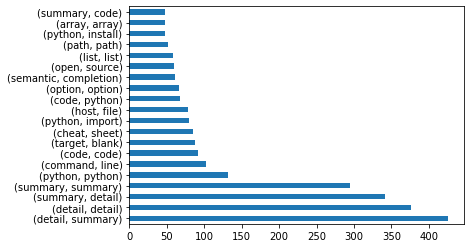

In [24]:
pd.Series(nltk.bigrams(python_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

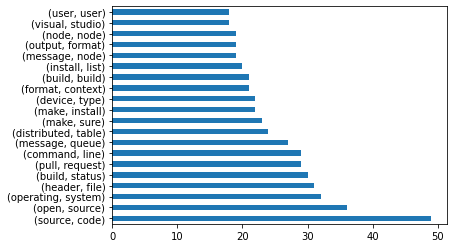

In [25]:
pd.Series(nltk.bigrams(c_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

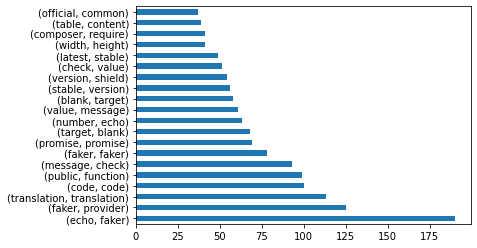

In [26]:
pd.Series(nltk.bigrams(php_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

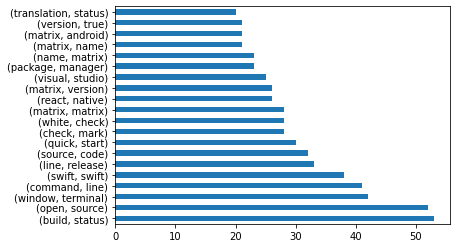

In [27]:
pd.Series(nltk.bigrams(cplus_words)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

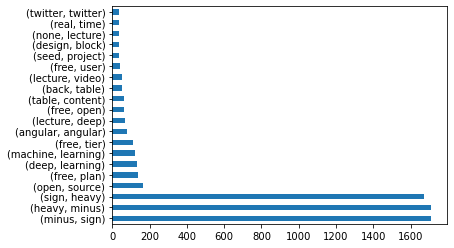

In [28]:
pd.Series(nltk.bigrams(html_words)
         ).value_counts().head(20).plot.barh()

In [29]:
# pd.Series(nltk.bigrams(other_words)
#          ).value_counts().head(20).plot.barh()

In [30]:
train.language.value_counts()

c++       64
python    64
php       64
c         62
html      49
Name: language, dtype: int64

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# same basic process as any sklearn transformation:
# make the thing
cv = CountVectorizer()
# use the thing
bag_of_words = cv.fit_transform(df.true_clean)

In [32]:
bag_of_words

<506x9227 sparse matrix of type '<class 'numpy.int64'>'
	with 95826 stored elements in Compressed Sparse Row format>

In [33]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [34]:
bow = pd.DataFrame(bag_of_words.todense())
bow.columns = cv.get_feature_names_out()

In [35]:
bow

,aaron,abandoned,abase,abba,abbreviation,abide,abigail,ability,able,ably,...,zestful,ziggurat,zigzag,zing,zippy,zombie,zonal,zone,zoom,zorro
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
bow.apply(lambda row: row / row.sum(), axis=1)

,aaron,abandoned,abase,abba,abbreviation,abide,abigail,ability,able,ably,...,zestful,ziggurat,zigzag,zing,zippy,zombie,zonal,zone,zoom,zorro
0,0.0,0.0,0.0,0.012821,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.004093,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.001397,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
bag_of_words = tfidf.fit_transform(train.true_clean)
pd.DataFrame(bag_of_words.todense(), 
             columns=tfidf.get_feature_names_out())

,aaron,abandoned,abba,abbreviation,abide,abigail,ability,able,ably,abort,...,zend,zero,zigzag,zing,zippy,zombie,zonal,zone,zoom,zorro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.043761,0.032065,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.019248,0.0,0.024676,...,0.0,0.006224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# zip: put these two things of the same length together
# dict: turn those two associated things into a k: v pair
# pd.Series: turn those keys into indeces, and the values into values
pd.Series(
    dict(
        zip(
            tfidf.get_feature_names_out(), tfidf.idf_)))

aaron           5.618415
abandoned       5.618415
abba            6.023881
abbreviation    5.330733
abide           4.637586
                  ...   
zombie          6.023881
zonal           6.023881
zone            4.925268
zoom            6.023881
zorro           6.023881
Length: 7314, dtype: float64

In [39]:
cv = CountVectorizer(ngram_range=(2, 2))
bag_of_grams = cv.fit_transform(train.true_clean)

In [40]:
pd.DataFrame(bag_of_grams.todense(),
            columns=cv.get_feature_names())

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron frost,aaron irfan,abandoned favor,abandoned significant,abba unsigned,abbreviation abbreviation,abbreviation echo,abbreviation generate,abbreviation love,abide apache,...,zone editor,zone identifier,zone location,zone mass,zone omit,zoom secure,zoom zoom,zorro enterprise,zorro mobile,zorro zorro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
X_train = train.true_clean
y_train = train.language
X_validate = validate.true_clean
y_validate = validate.language

In [60]:
# Whatever transformations we apply to X_train need to be applied to X_test
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

0.44224422442244227

In [61]:
# as with any other sklearn transformation, 
# transform only on our validate and/or test, 
# only fit on train
X_validate_bow = cv.transform(X_validate)
tree.score(X_validate_bow, y_validate)

0.43564356435643564

In [45]:
pd.Series(
    dict(
    zip(cv.get_feature_names(), 
    tree.feature_importances_))).sort_values().tail()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


finished    0.000000
zorro       0.000000
pull        0.078703
python      0.414965
composer    0.506332
dtype: float64

In [100]:
X_train = train.true_clean
y_train = train.language
X_validate = validate.true_clean
y_validate = validate.language
X_test = test.true_clean
y_test = test.language

In [101]:
# Whatever transformations we apply to X_train need to be applied to X_test
tfidf = TfidfVectorizer()
X_bow = tfidf.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

0.45874587458745875

In [102]:
X_validate_bow = tfidf.transform(X_validate)
tree.score(X_validate_bow, y_validate)

0.40594059405940597

In [265]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB

In [104]:
clf = MultinomialNB(alpha=.5, fit_prior=True)

In [105]:
clf.fit(X_bow, y_train)

MultinomialNB(alpha=0.5)

In [106]:
clf.predict_proba(X_validate_bow)

array([[0.34668269, 0.20293718, 0.06950339, 0.11808514, 0.2627916 ],
       [0.19087479, 0.14286864, 0.12149969, 0.39686552, 0.14789135],
       [0.23867823, 0.20037724, 0.18195062, 0.18352589, 0.19546801],
       [0.23861921, 0.31253684, 0.03236384, 0.2579142 , 0.15856591],
       [0.17242265, 0.19336115, 0.07196849, 0.11247156, 0.44977614],
       [0.22999971, 0.15680232, 0.10304468, 0.12839951, 0.38175378],
       [0.30895998, 0.21538956, 0.10720815, 0.15004807, 0.21839425],
       [0.26233445, 0.19967922, 0.07867571, 0.1581697 , 0.30114093],
       [0.15159116, 0.26117263, 0.05047797, 0.11678605, 0.41997219],
       [0.31909525, 0.20633294, 0.10914693, 0.16338886, 0.20203602],
       [0.24140148, 0.21458139, 0.05306334, 0.20360755, 0.28734622],
       [0.19450053, 0.31221856, 0.12591465, 0.18244059, 0.18492567],
       [0.05412264, 0.11989634, 0.05623511, 0.05392149, 0.71582443],
       [0.29356133, 0.22098646, 0.03251972, 0.18984111, 0.26309139],
       [0.17522357, 0.478944  , 0.

In [107]:
clf.score(X_bow, y_train)

0.9306930693069307

In [108]:
clf.score(X_validate_bow, y_validate)

0.5742574257425742

In [268]:
clf = CategoricalNB(alpha=1, fit_prior=True)

In [114]:
train2 = pd.DataFrame(dict(actual=y_train))
validate2 = pd.DataFrame(dict(actual=y_validate))
test2 = pd.DataFrame(dict(actual=y_test))
X_test_bow = tfidf.transform(X_test)

In [216]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='saga', penalty='elasticnet', random_state = 217, class_weight='balanced', l1_ratio=.001).fit(X_bow, y_train)

train2['predicted'] = lm.predict(X_bow)
validate2['predicted'] = lm.predict(X_validate_bow)
test2['predicted'] = lm.predict(X_test_bow)

In [217]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy: {:.2%}'.format(accuracy_score(train2.actual, train2.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train2.predicted, train2.actual))
print('---')
print(classification_report(train2.actual, train2.predicted))

Accuracy: 97.36%
---
Confusion Matrix
actual      c  c++  html  php  python
predicted                            
c          60    0     0    0       0
c++         0   62     1    0       0
html        2    1    48    0       2
php         0    0     0   63       0
python      0    1     0    1      62
---
              precision    recall  f1-score   support

           c       1.00      0.97      0.98        62
         c++       0.98      0.97      0.98        64
        html       0.91      0.98      0.94        49
         php       1.00      0.98      0.99        64
      python       0.97      0.97      0.97        64

    accuracy                           0.97       303
   macro avg       0.97      0.97      0.97       303
weighted avg       0.97      0.97      0.97       303



In [218]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate2.actual, validate2.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate2.predicted, validate2.actual))
print('---')
print(classification_report(validate2.actual, validate2.predicted))

Accuracy: 64.36%
---
Confusion Matrix
actual      c  c++  html  php  python
predicted                            
c          13    7     5    1       0
c++         1    9     2    1       0
html        3    1     9    3       3
php         0    2     1   16       0
python      3    2     0    1      18
---
              precision    recall  f1-score   support

           c       0.50      0.65      0.57        20
         c++       0.69      0.43      0.53        21
        html       0.47      0.53      0.50        17
         php       0.84      0.73      0.78        22
      python       0.75      0.86      0.80        21

    accuracy                           0.64       101
   macro avg       0.65      0.64      0.64       101
weighted avg       0.66      0.64      0.64       101



In [219]:
print('Accuracy: {:.2%}'.format(accuracy_score(test2.actual, test2.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test2.predicted, test2.actual))
print('---')
print(classification_report(test2.actual, test2.predicted))

Accuracy: 58.82%
---
Confusion Matrix
actual      c  c++  html  php  python
predicted                            
c          11    6     0    3       1
c++         6   10     1    0       2
html        2    3    10    3       4
php         0    1     2   16       1
python      1    2     4    0      13
---
              precision    recall  f1-score   support

           c       0.52      0.55      0.54        20
         c++       0.53      0.45      0.49        22
        html       0.45      0.59      0.51        17
         php       0.80      0.73      0.76        22
      python       0.65      0.62      0.63        21

    accuracy                           0.59       102
   macro avg       0.59      0.59      0.59       102
weighted avg       0.60      0.59      0.59       102



In [261]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='newton-cg', random_state = 217, fit_intercept=True, class_weight='balanced', multi_class='multinomial', max_iter=200).fit(X_bow, y_train)

train2['predicted'] = lm.predict(X_bow)
validate2['predicted'] = lm.predict(X_validate_bow)
test2['predicted'] = lm.predict(X_test_bow)

In [262]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy: {:.2%}'.format(accuracy_score(train2.actual, train2.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train2.predicted, train2.actual))
print('---')
print(classification_report(train2.actual, train2.predicted))

Accuracy: 97.36%
---
Confusion Matrix
actual      c  c++  html  php  python
predicted                            
c          60    0     0    0       0
c++         0   62     1    0       0
html        2    1    48    0       2
php         0    0     0   63       0
python      0    1     0    1      62
---
              precision    recall  f1-score   support

           c       1.00      0.97      0.98        62
         c++       0.98      0.97      0.98        64
        html       0.91      0.98      0.94        49
         php       1.00      0.98      0.99        64
      python       0.97      0.97      0.97        64

    accuracy                           0.97       303
   macro avg       0.97      0.97      0.97       303
weighted avg       0.97      0.97      0.97       303



In [263]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate2.actual, validate2.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate2.predicted, validate2.actual))
print('---')
print(classification_report(validate2.actual, validate2.predicted))

Accuracy: 65.35%
---
Confusion Matrix
actual      c  c++  html  php  python
predicted                            
c          13    7     4    1       0
c++         1    9     2    1       0
html        3    1    10    3       3
php         0    2     1   16       0
python      3    2     0    1      18
---
              precision    recall  f1-score   support

           c       0.52      0.65      0.58        20
         c++       0.69      0.43      0.53        21
        html       0.50      0.59      0.54        17
         php       0.84      0.73      0.78        22
      python       0.75      0.86      0.80        21

    accuracy                           0.65       101
   macro avg       0.66      0.65      0.65       101
weighted avg       0.67      0.65      0.65       101



In [264]:
print('Accuracy: {:.2%}'.format(accuracy_score(test2.actual, test2.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test2.predicted, test2.actual))
print('---')
print(classification_report(test2.actual, test2.predicted))

Accuracy: 57.84%
---
Confusion Matrix
actual      c  c++  html  php  python
predicted                            
c          11    6     0    3       1
c++         6   10     1    0       2
html        2    3    10    3       4
php         0    1     2   16       2
python      1    2     4    0      12
---
              precision    recall  f1-score   support

           c       0.52      0.55      0.54        20
         c++       0.53      0.45      0.49        22
        html       0.45      0.59      0.51        17
         php       0.76      0.73      0.74        22
      python       0.63      0.57      0.60        21

    accuracy                           0.58       102
   macro avg       0.58      0.58      0.58       102
weighted avg       0.59      0.58      0.58       102

